In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve,auc,accuracy_score,f1_score
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
import sys
sys.path.insert(0,'/home/dsc/Documents/TFM/functions/')
from funciones import PreparaDatosEntrenamientoTest
from funciones import Clasifica
from funciones import CurvaRocAnalisis
from funciones import CrossValidation
from funciones import NormalizaDatos
from funciones import CalculaNumeroVariablesOptimas

/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
dataSet=pd.read_csv("/home/dsc/Documents/TFM/data/default of credit card clients refinado.csv")
dataSet=dataSet.iloc[:,(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)]

In [3]:
dataSample=dataSet.sample(5000)

En este algoritmo vamos a utilizar Support Vector Machine y a optimizarlo para intentar sacar el máximo rendimiento a nuestros datos. Este algoritmo construye un hiperplano (vectgor soporte) para clasficar los puntos en diferentes clases. Los puntos son los vectores de variables de entrada. Se busca separar mediante el hiperplano de forma óptima los diferentes puntos. La forma óptima es encontrar la máxima distancia a los puntos más cercanos al mismo. 

Lo primero que vamos a hacer es probar SVM en bruto con los diferentes tipos de kernel que tiene. El kernel es la función que utiliza para calcular la distancia. Vamos a utilizar tres:
        
          1. Lineal: función líneal, útil cuando los datos son linealmente separables.
          2. Polinomial: función polinomial, cuando los datos no son linealmente separables. 
          3. Rbf: Distancia euclídea o norma vectorial.

In [4]:
trainx,trainy,testx,testy = PreparaDatosEntrenamientoTest(dataSet)

('Precision:', 0.77478682494566131)
('F1Score:', 0.010286554004408525)


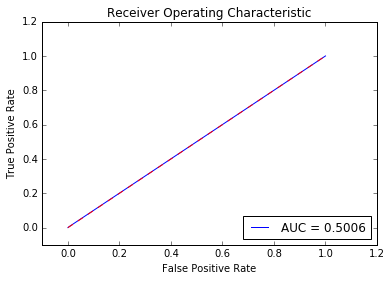

Default test,0,1
Default predicho,,
0,4627,19
1,1328,7


In [5]:
clfSVClinear=LinearSVC()
prediccion=Clasifica(clfSVClinear,trainx,trainy,testx)
CurvaRocAnalisis(testy,prediccion)
pd.crosstab(testy['default payment next month'],prediccion, rownames=['Default test'], colnames=['Default predicho'])

('Precision:', 0.78370370370370368)
('F1Score:', 0.028106508875739643)


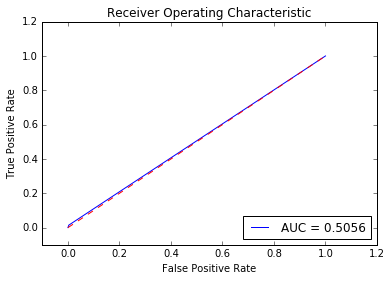

Default test,0,1
Default predicho,,
0,4742,15
1,1299,19


In [24]:
'trainx,trainy,testx,testy = PreparaDatosEntrenamientoTest(dataSet)
clfSVCrbf=SVC(kernel='rbf')'
prediccion=Clasifica(clfSVCrbf,trainx,trainy,testx)
CurvaRocAnalisis(testy,prediccion)
pd.crosstab(testy['default payment next month'],prediccion, rownames=['Default predicho'], colnames=['Default test'])

/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


('Precision:', 0.22884326489734602)
('F1Score:', 0.36328555678059538)


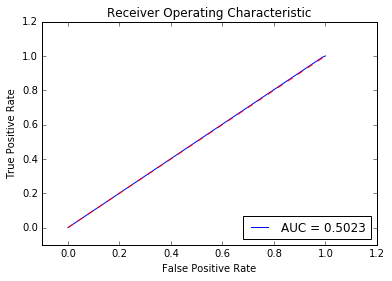

Default predicho,0,1
Default test,,
0,53,4611
1,9,1318


In [4]:
trainx,trainy,testx,testy = PreparaDatosEntrenamientoTest(dataSet)
clfSVClinear=SVC(kernel='poly',max_iter=500)
prediccion=Clasifica(clfSVClinear,trainx,trainy,testx)
CurvaRocAnalisis(testy,prediccion)
pd.crosstab(testy['default payment next month'],prediccion, rownames=['Default test'], colnames=['Default predicho'])

Como este algoritmo funciona con distancias vamos a comprobar qué efecto tiene normalizar los datos. Vamos a realizar para cada kernel los dos tipos de normalizaciones que tenemos programadas: minmax y zscore

Lineal

/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('Precision:', 0.78442090878032111)
('F1Score:', 0.082848837209302334)


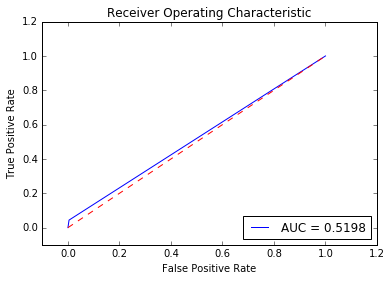

Default test,0,1
Default predicho,,
0,4535,19
1,1243,57


In [6]:
dataSetZscore= NormalizaDatos(dataSet,['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],"Zscore")
dataSetZscoreTrainx,dataSetZscoreTrainy,dataSetZscoreTestx,dataSetZscoreTesty=PreparaDatosEntrenamientoTest(dataSetZscore)
clfSVClinear=LinearSVC()
prediccion=Clasifica(clfSVClinear,dataSetZscoreTrainx,dataSetZscoreTrainy,dataSetZscoreTestx)
CurvaRocAnalisis(dataSetZscoreTesty,prediccion)
pd.crosstab(dataSetZscoreTesty['default payment next month'],prediccion, rownames=['Default predicho'], colnames=['Default test'])

('Precision:', 0.30393964794635375)
('F1Score:', 0.37601442741208296)


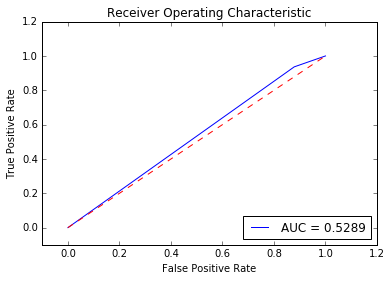

Default test,0,1
Default predicho,,
0,562,4067
1,85,1251


In [6]:
dataSetMinMax= NormalizaDatos(dataSet,['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],"MinMax")
dataSetMinMaxTrainx,dataSetMinMaxTrainy,dataSetMinMaxTestx,dataSetMinMaxTesty=PreparaDatosEntrenamientoTest(dataSetZscore)
clfSVClinear=LinearSVC()
prediccion=Clasifica(clfSVClinear,dataSetMinMaxTrainx,dataSetMinMaxTrainy,dataSetMinMaxTestx)
CurvaRocAnalisis(dataSetMinMaxTesty,prediccion)
pd.crosstab(dataSetMinMaxTesty['default payment next month'],prediccion, rownames=['Default predicho'], colnames=['Default test'])

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
2


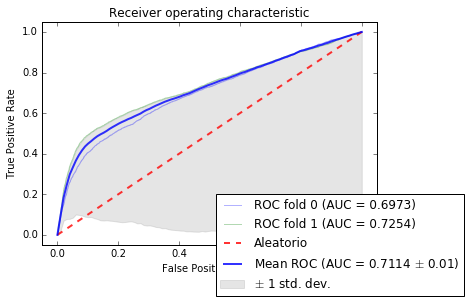

3


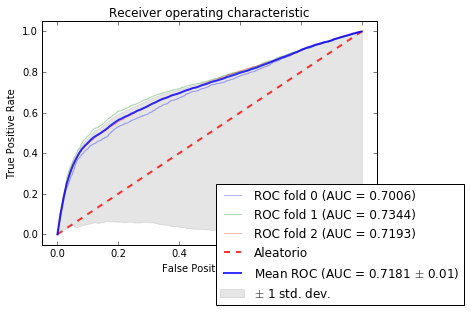

4


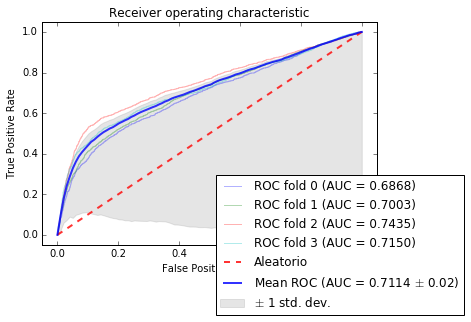

5


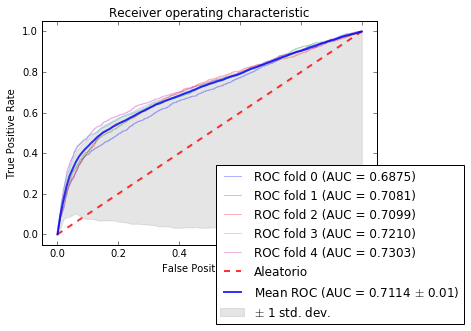

6


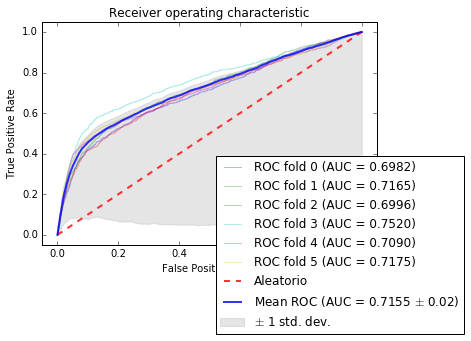

7


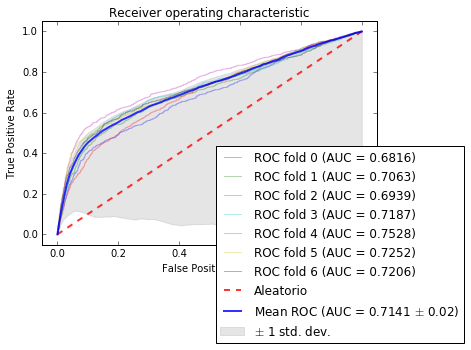

8


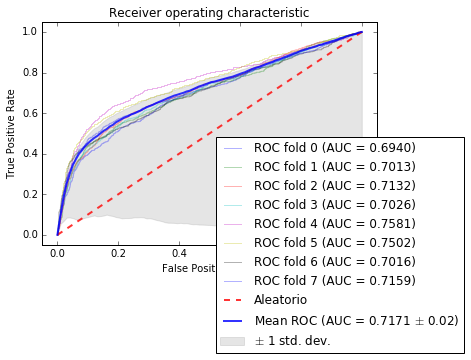

9


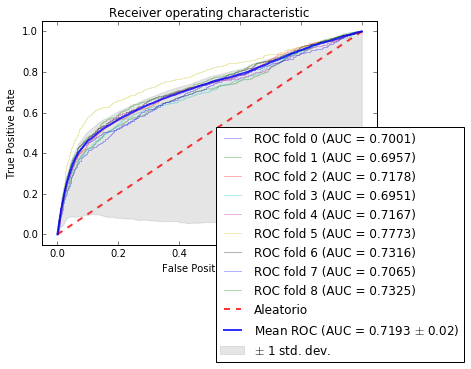

10


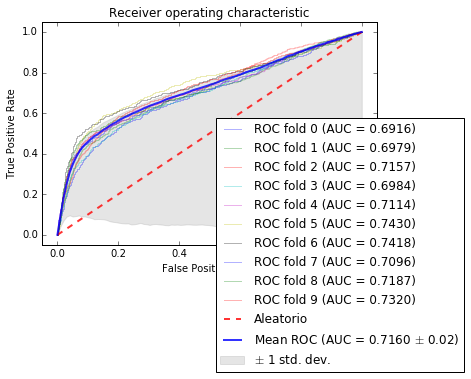

11


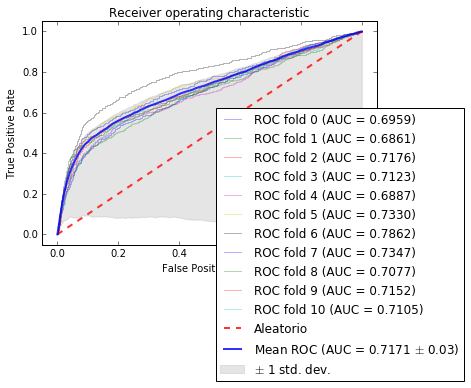

12


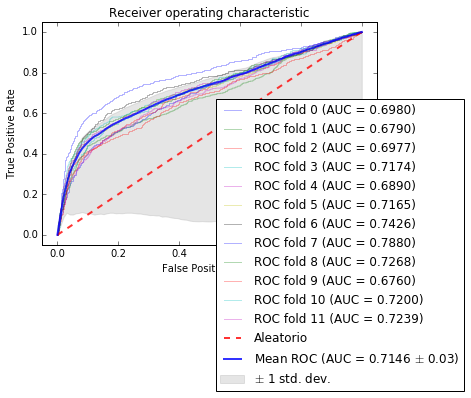

13


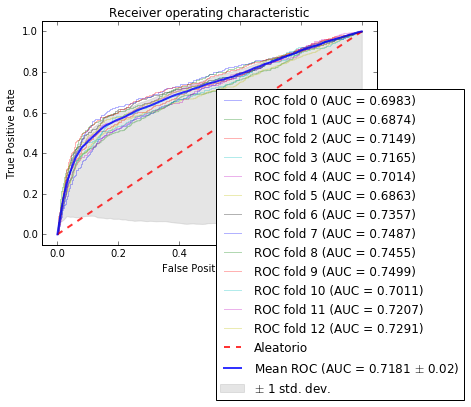

14


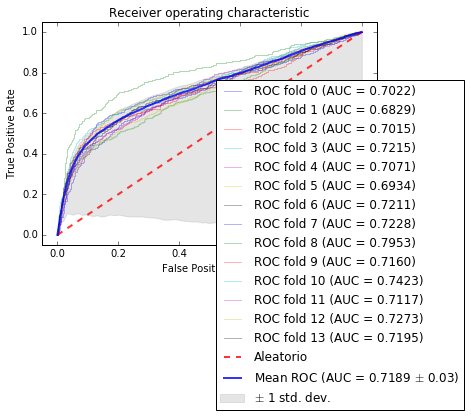

15


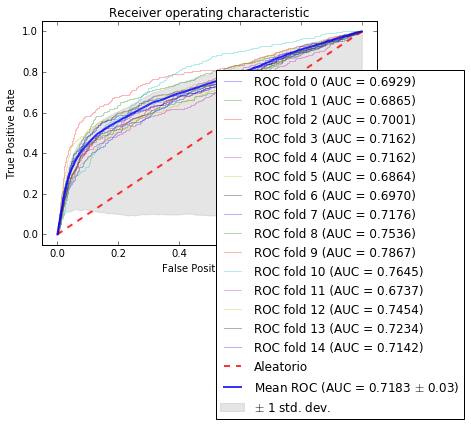

16


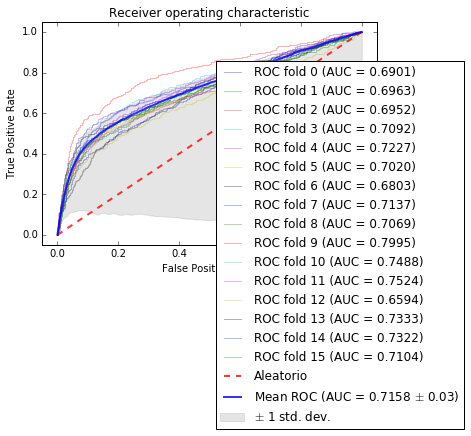

17


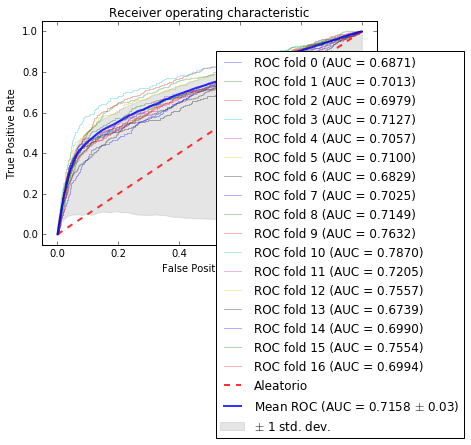

18


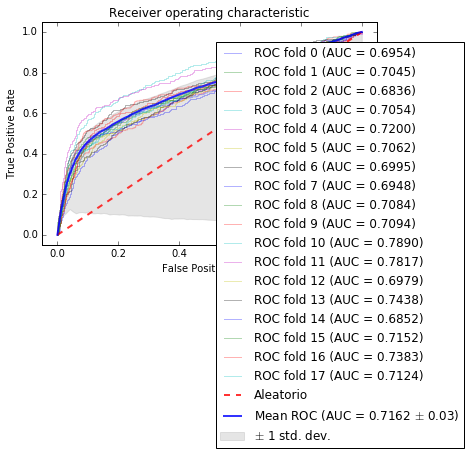

19


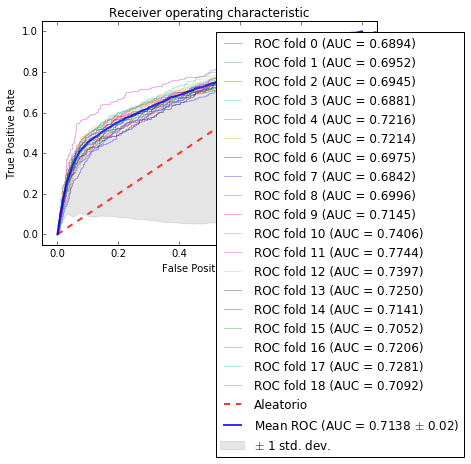

0.71383527506225264

In [4]:
dataSetZscore= NormalizaDatos(dataSet,['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],"Zscore")
clfSVClinear=CalibratedClassifierCV(LinearSVC())
CrossValidation(dataSetZscore,clfSVClinear,2,20)

Elegimos el número de particiones 9 para nuestro cross validation porque nos da el mejor resultado

In [23]:
X = dataSetZscore.ix[:,:(len(dataSetZscore.columns)-1)]
Y = dataSetZscore.ix[:,(len(dataSetZscore.columns)-1):]

Cs = np.logspace(-2, 10, 13)

param_grid = {'C': Cs}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=9, scoring='roc_auc')
grid_search.fit(X, Y['default payment next month'])
print(grid_search.best_params_)

{'C': 0.10000000000000001}


[9]
9


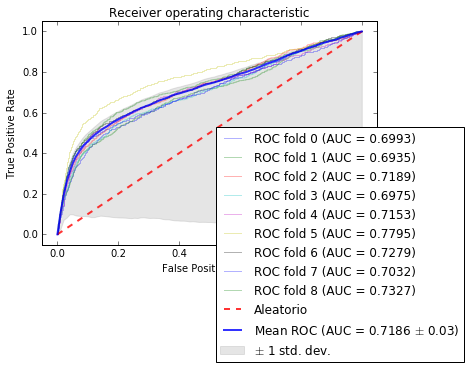

0.71864167136665458

In [28]:
clfSVClinear=CalibratedClassifierCV(LinearSVC(C=0.10000000000000001))
CrossValidation(dataSetZscore,clfSVClinear,9,10)

10


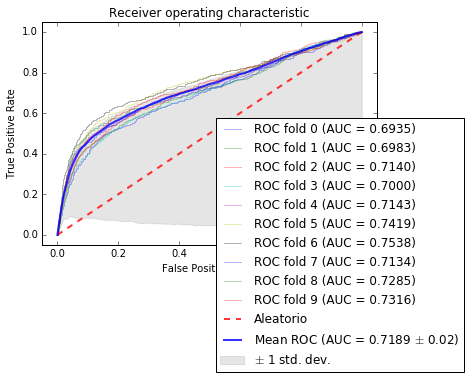

0.71891647126034575

In [6]:
clfSVClinear=CalibratedClassifierCV(LinearSVC(C=0.10000000000000001))
CrossValidation(dataSetZscore,clfSVClinear,10,11)

11


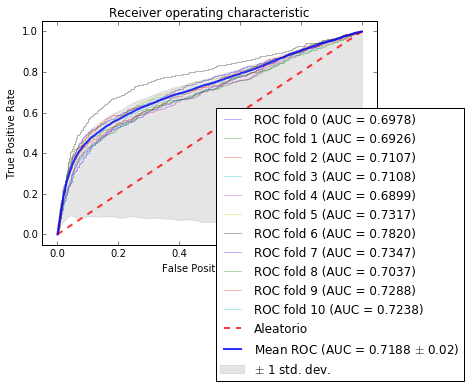

0.7187788220771002

In [7]:
clfSVClinear=CalibratedClassifierCV(LinearSVC(C=0.10000000000000001))
CrossValidation(dataSetZscore,clfSVClinear,11,12)

rbf

('Precision:', 0.82184589331075364)
('F1Score:', 0.47504990019960092)


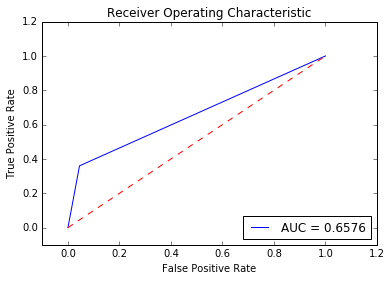

Default test,0,1
Default predicho,,
0,4377,206
1,846,476


In [7]:
dataSetZscore= NormalizaDatos(dataSet,['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],"Zscore")
dataSetZscoreTrainx,dataSetZscoreTrainy,dataSetZscoreTestx,dataSetZscoreTesty=PreparaDatosEntrenamientoTest(dataSetZscore)
clfSVCrbf=SVC(kernel='rbf')
prediccion=Clasifica(clfSVCrbf,dataSetZscoreTrainx,dataSetZscoreTrainy,dataSetZscoreTestx)
CurvaRocAnalisis(dataSetZscoreTesty,prediccion)
pd.crosstab(dataSetZscoreTesty['default payment next month'],prediccion, rownames=['Default test'], colnames=['Default predicho'])

('Precision:', 0.81475244189962948)
('F1Score:', 0.43357363542739447)


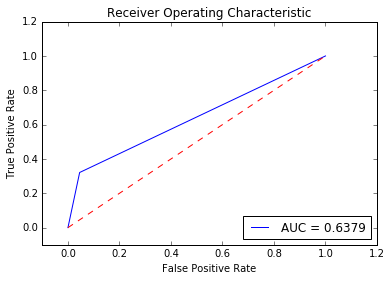

Default test,0.0,1.0
Default predicho,,
0.0,4417,210
1.0,890,421


In [16]:
dataSetMinMax= NormalizaDatos(dataSet,['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],"MinMax")
dataSetMinMaxTrainx,dataSetMinMaxTrainy,dataSetMinMaxTestx,dataSetMinMaxTesty=PreparaDatosEntrenamientoTest(dataSetZscore)
clfSVCrbf=SVC(kernel='rbf')
prediccion=Clasifica(clfSVCrbf,dataSetMinMaxTrainx,dataSetMinMaxTrainy,dataSetMinMaxTestx)
CurvaRocAnalisis(dataSetMinMaxTesty,prediccion)
pd.crosstab(dataSetMinMaxTesty['default payment next month'],prediccion, rownames=['Default predicho'], colnames=['Default test'])

2


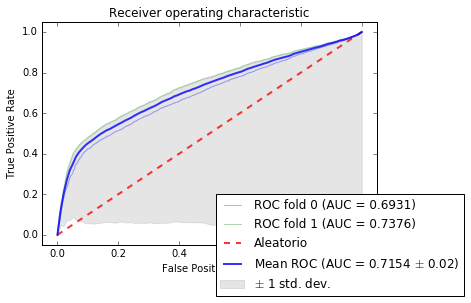

3


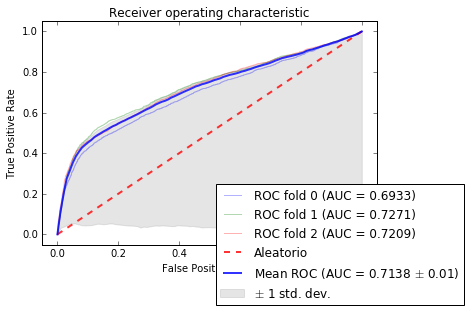

4


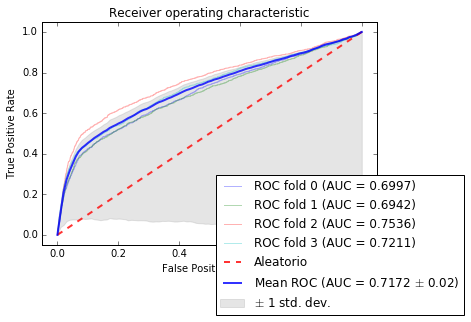

5


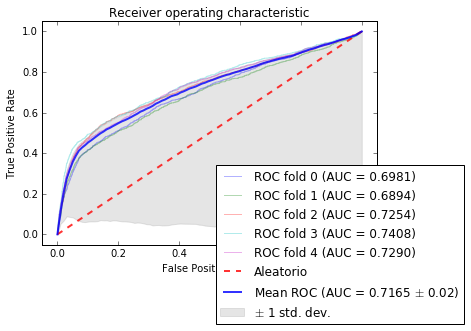

6


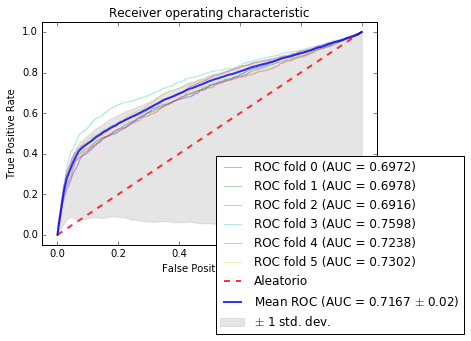

7


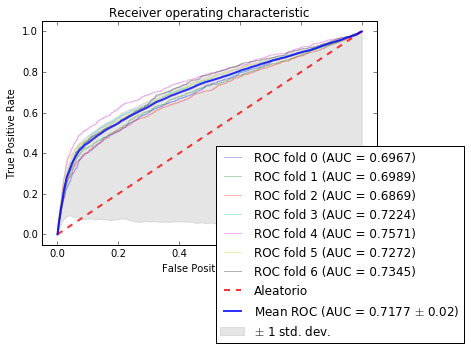

8


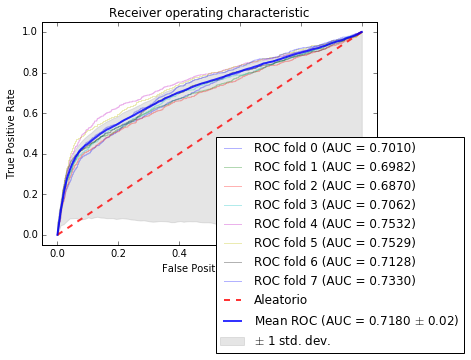

9


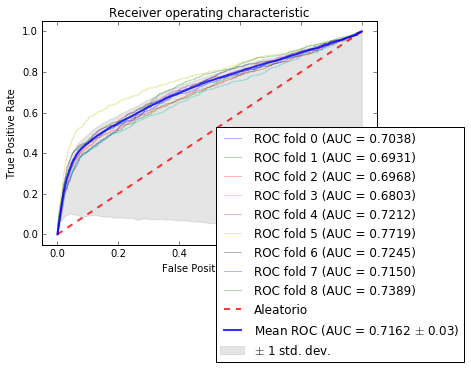

10


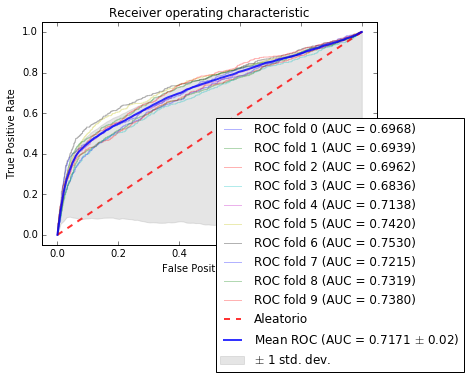

11


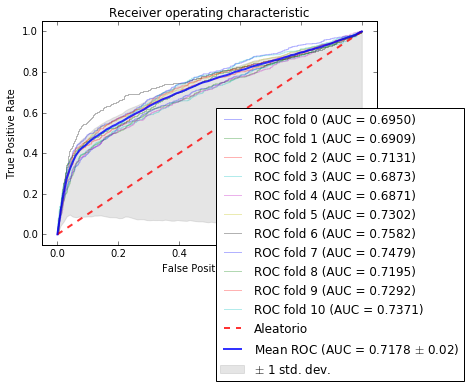

12


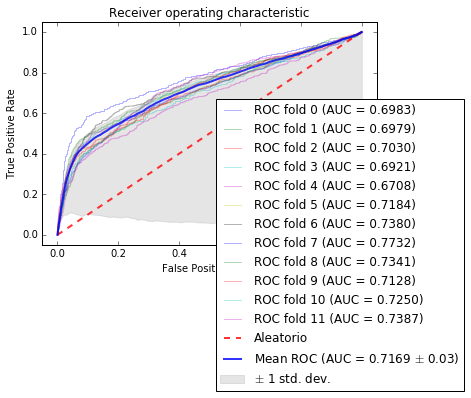

13


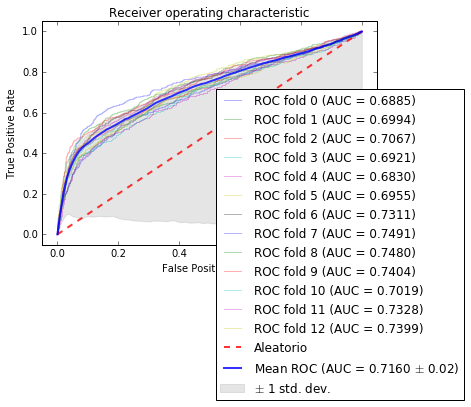

14


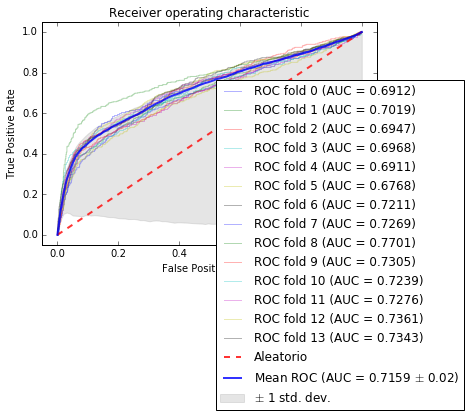

15


In [ ]:
clfSVCrbf=SVC(kernel='rbf',probability=True)
CrossValidation(dataSetZscore,clfSVCrbf,2,20)

15


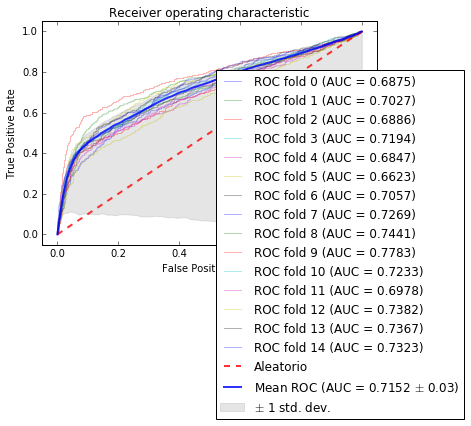

16


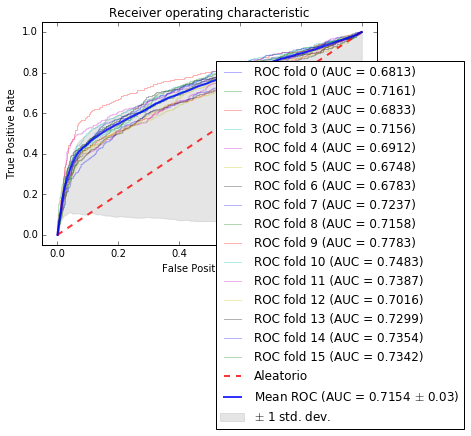

17


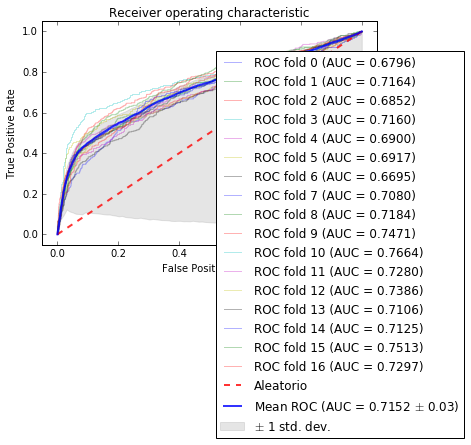

18


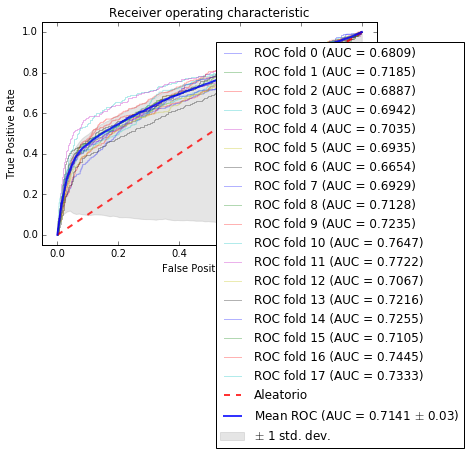

19


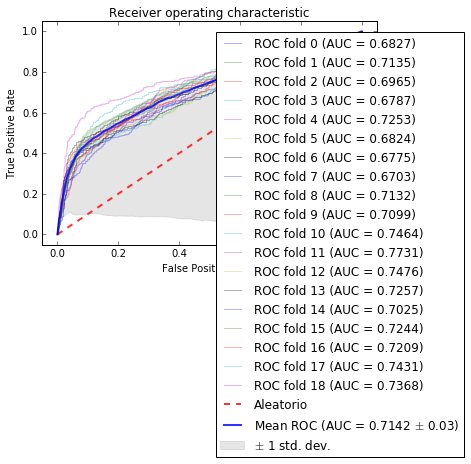

0.71540668296793231

In [4]:
dataSetZscore= NormalizaDatos(dataSet,['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],"Zscore")
clfSVCrbf=SVC(kernel='rbf',probability=True)
CrossValidation(dataSetZscore,clfSVCrbf,15,20)

Ahora vamos a obtener los parámetros óptimos para el clasificador de support vector machine. Estos parámetros son C y gamma.
C intercambia la clasificación errónea de ejemplos de entrenamiento contra la simplicidad de la superficie de decisión. Valores bajos hacen que la superficie de decisión sea lisa, mientras que una C alta tiene como objetivo clasificar correctamente todos los ejemplos de entrenamiento dando libertad al modelo para seleccionar más muestras como vectores de soporte.

Gamma define hasta dónde llega la influencia de un único ejemplo de entrenamiento, con valores bajos que significan "lejos" y valores altos que significan "cercanos". Los parámetros gamma se pueden ver como el inverso del radio de influencia de las muestras seleccionadas por el modelo como vectores de soporte.

In [5]:
dataSetZscore= NormalizaDatos(dataSet,['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],"Zscore")
X = dataSetZscore.sample(5000).ix[:,:(len(dataSetZscore.sample(5000).columns)-1)]
Y = dataSetZscore.sample(5000).ix[:,(len(dataSetZscore.sample(5000).columns)-1):]


rangosC = (0.01,0.1,1.0)
rangosGamma = (0.01,0.1,1.0)

param_grid = {'C':rangosC,'gamma':rangosGamma}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=7, scoring='roc_auc')
grid_search.fit(X, Y['default payment next month'])
print(grid_search.best_params_)

{'C': 0.01, 'gamma': 0.01}


7


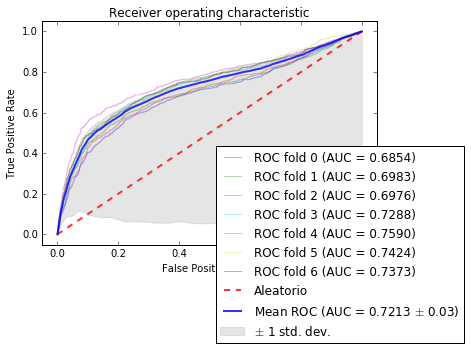

0.72127097741849744

In [7]:
clfSVCrbf=SVC(kernel='rbf',probability=True,C=0.01,gamma=0.01)
CrossValidation(dataSetZscore,clfSVCrbf,7,8)

Con un kernel no lineal no nos podemos hacer la reducción de variables de forma recursiva como con el kernel lineal 

In [17]:
dataSetResult=pd.read_csv("/home/dsc/Documents/TFM/data/resultados.csv")
d={'Algoritmo':['SVCrbf'],'RocAucBruto':[0.5056],'RocNormalizado':[0.6576],'RocAucCrossValidation':[ 0.7180],'RocAucParameters':[0.7213],'RocAucVariables':[0.7212]}
dataSetNuevo=pd.DataFrame(data=d)
dataSetResult=dataSetResult.append(dataSetNuevo)
dataSetResult.to_csv(path_or_buf='/home/dsc/Documents/TFM/data/resultados.csv',index=False)

In [18]:
dataSetResult

,Algoritmo,RocAucBruto,RocAucCrossValidation,RocAucParameters,RocAucVariables,RocNormalizado
0,RandomForest,0.6448,0.7819,0.7848,0.7849,0.6441
1,GradientBoosting,0.6538,0.7814,0.7818,0.7814,0.6561
0,SVCrbf,0.5056,0.7180,0.7213,0.7212,0.6576
